<a href="https://colab.research.google.com/github/codeprogredire/data-science/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the required libraries

In [1]:
from google.colab import drive # for connecting google drive with colab
import pandas as pd #for data manipulation
import numpy as np #for handling arrays and performing algebraic operations

#Connect google colab with Drive

In [3]:
drive.mount('/content/gdrive')      #This library is used for mounting drive

Mounted at /content/gdrive


# Download Housing dataset and store it in drive

In [4]:
import gdown
file_id='1ZPpUs7KwGa8xh4G4Zueq9j0E7_hwDbxT'
output_file='prices.zip'
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

Downloading...
From: https://drive.google.com/uc?id=1ZPpUs7KwGa8xh4G4Zueq9j0E7_hwDbxT
To: /content/prices.zip
100%|██████████| 4.74k/4.74k [00:00<00:00, 2.68MB/s]


'prices.zip'

In [7]:
# Extract the zip file
import zipfile
with zipfile.ZipFile("/content/prices.zip","r") as zip_ref:         #Extracting the data
    zip_ref.extractall("/content")

In [8]:
!cp /content/Housing.csv "gdrive/MyDrive/data-science/linear-regression"  #Saving the extracted content in user's Google Drive.

#Reading the Housing dataset

In [9]:
data=pd.read_csv('/content/gdrive/MyDrive/data-science/linear-regression/Housing.csv')

In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Various parameters affect the price of the house.
**So we plot the various parameters wrt price of the house**

<Axes: xlabel='bedrooms', ylabel='price'>

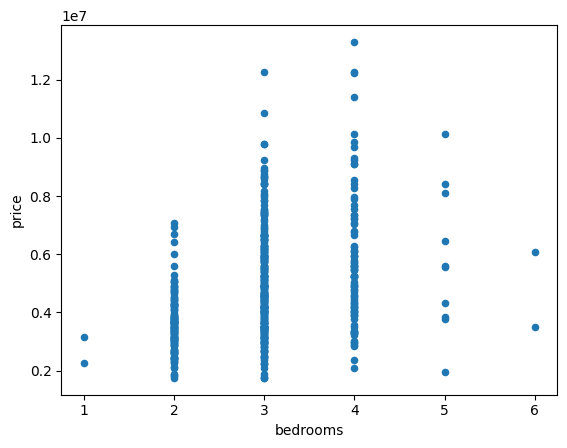

In [13]:
data.plot.scatter('bedrooms','price')

<Axes: xlabel='area', ylabel='price'>

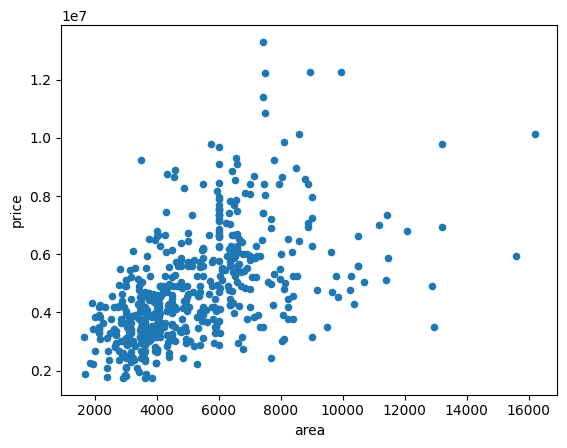

In [14]:
data.plot.scatter('area','price')

<Axes: xlabel='parking', ylabel='price'>

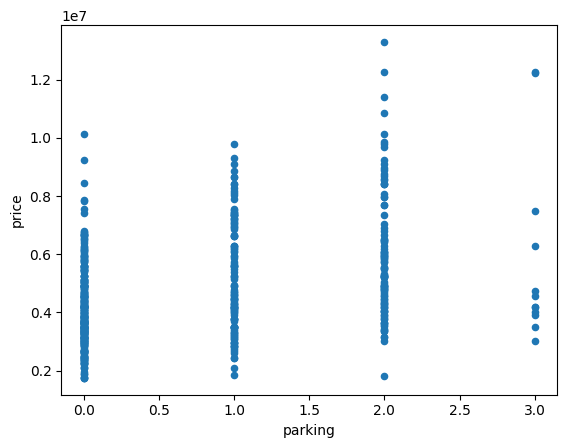

In [15]:
data.plot.scatter('parking','price')

# Split the data into train and test set

**Import required libraries**

In [16]:
import matplotlib.pyplot as plt       # This library is used to plot curves
from sklearn.model_selection import train_test_split  #This library is used for performing test_train_splits on the data
from sklearn.linear_model import LinearRegression     #This library is used for creating Linear Regression Models
from sklearn.metrics import mean_squared_error        #This library is used for finding mean squared error

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.area, data.price, test_size = 0.2,random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

**Plotting the train and test data**

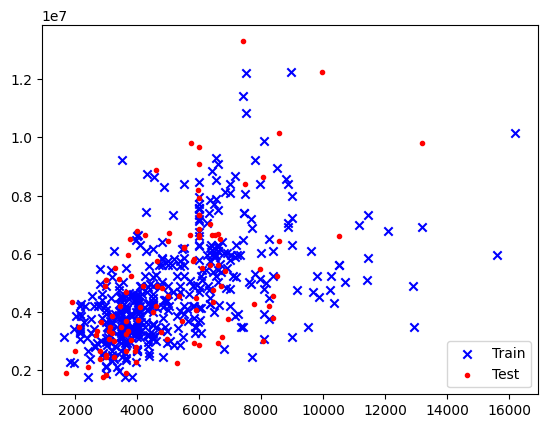

In [18]:
plt.scatter(X_train,y_train, c='blue', marker='x', label='Train')
plt.scatter(X_test, y_test, c='red', marker='.', label='Test')
plt.legend(loc='lower right')
plt.show()

#Build a Linear Regression model

In [20]:
model=LinearRegression()

In [21]:
#Train this model
model.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [22]:
#Use this model to make predictions on test data
y_pred = model.predict(X_test.reshape(-1,1))

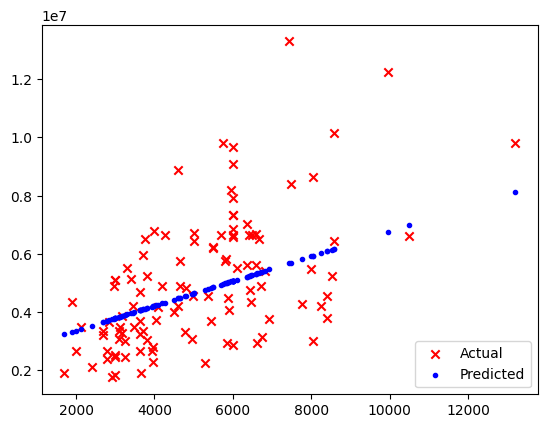

In [23]:
#Plotting the predicted and actual y_test value
plt.scatter(X_test,y_test, c='red', marker='x', label='Actual')
plt.scatter(X_test, y_pred, c='blue', marker='.', label='Predicted')
plt.legend(loc='lower right')
plt.show()

# Visualize the Regression curve

Text(0, 0.5, 'price')

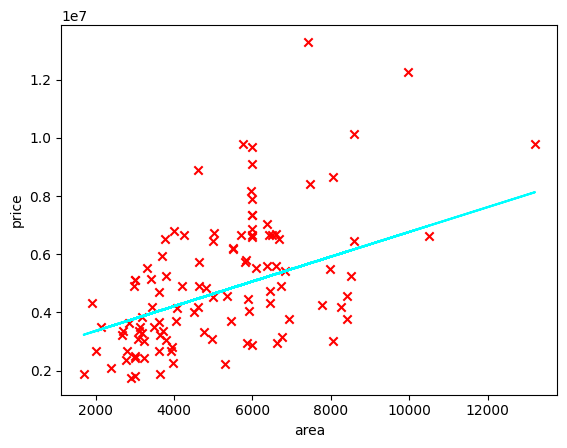

In [25]:
plt.scatter(X_test,y_test, c='red', marker='x', label='Actual')
plt.plot(X_test,y_pred,c='cyan')
plt.xlabel('area')
plt.ylabel('price')